In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from MakeSTFTs import *
from Train import *
from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples, duration=2.0 sec = 114 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

In [4]:
from HyperParameterTuning import *

# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#optimise_hyper_parameters()

# Alternatively: train a model with the best hyper-parameters we've found so far.
#train_best_params()

Using model=StepWiseVAEMLP
StepWiseMLPAutoEncoder compression: 22.8 x smaller
VariationalAutoEncoder compression: 641.2 x smaller
model=StepWiseVAEMLP, approx size=9,877,578 parameters, exact=9,923,748, difference=-0.4652%
model=StepWiseMLP_VAE(
  (stepwise): StepWiseMLPAutoEncoder(
    (encoder): Sequential(
      (0): Linear(in_features=2049, out_features=1909, bias=True)
      (1): ReLU()
      (2): Linear(in_features=1909, out_features=1299, bias=True)
      (3): ReLU()
      (4): Linear(in_features=1299, out_features=45, bias=True)
    )
    (decoder): Sequential(
      (0): Linear(in_features=1070, out_features=1066, bias=True)
      (1): ReLU()
      (2): Linear(in_features=1066, out_features=1052, bias=True)
      (3): ReLU()
      (4): Linear(in_features=1052, out_features=1024, bias=True)
    )
  )
  (vae): VariationalAutoEncoder(
    (encoder_layers): ModuleList()
    (fc_mu): Linear(in_features=5130, out_features=8, bias=True)
    (fc_logvar): Linear(in_features=5130, out_f

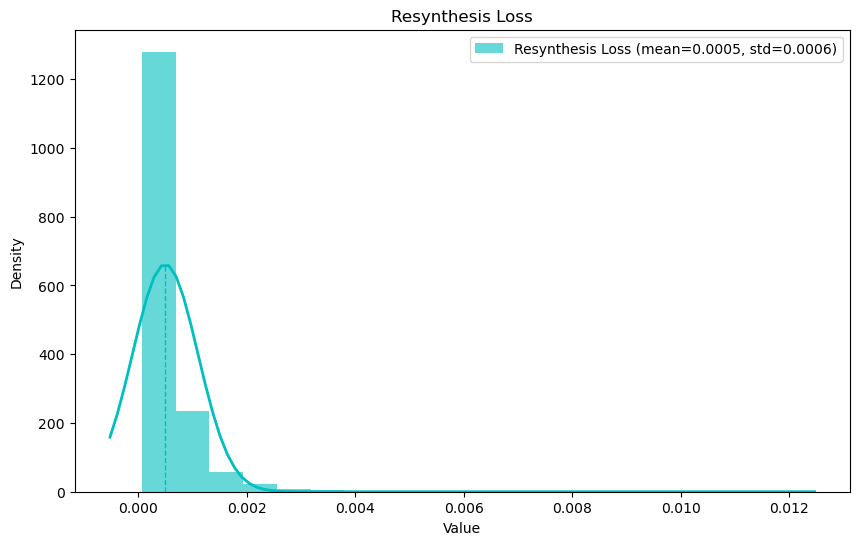

Encoded samples:
 169 x Vocal
 167 x Synth
 121 x Guitar


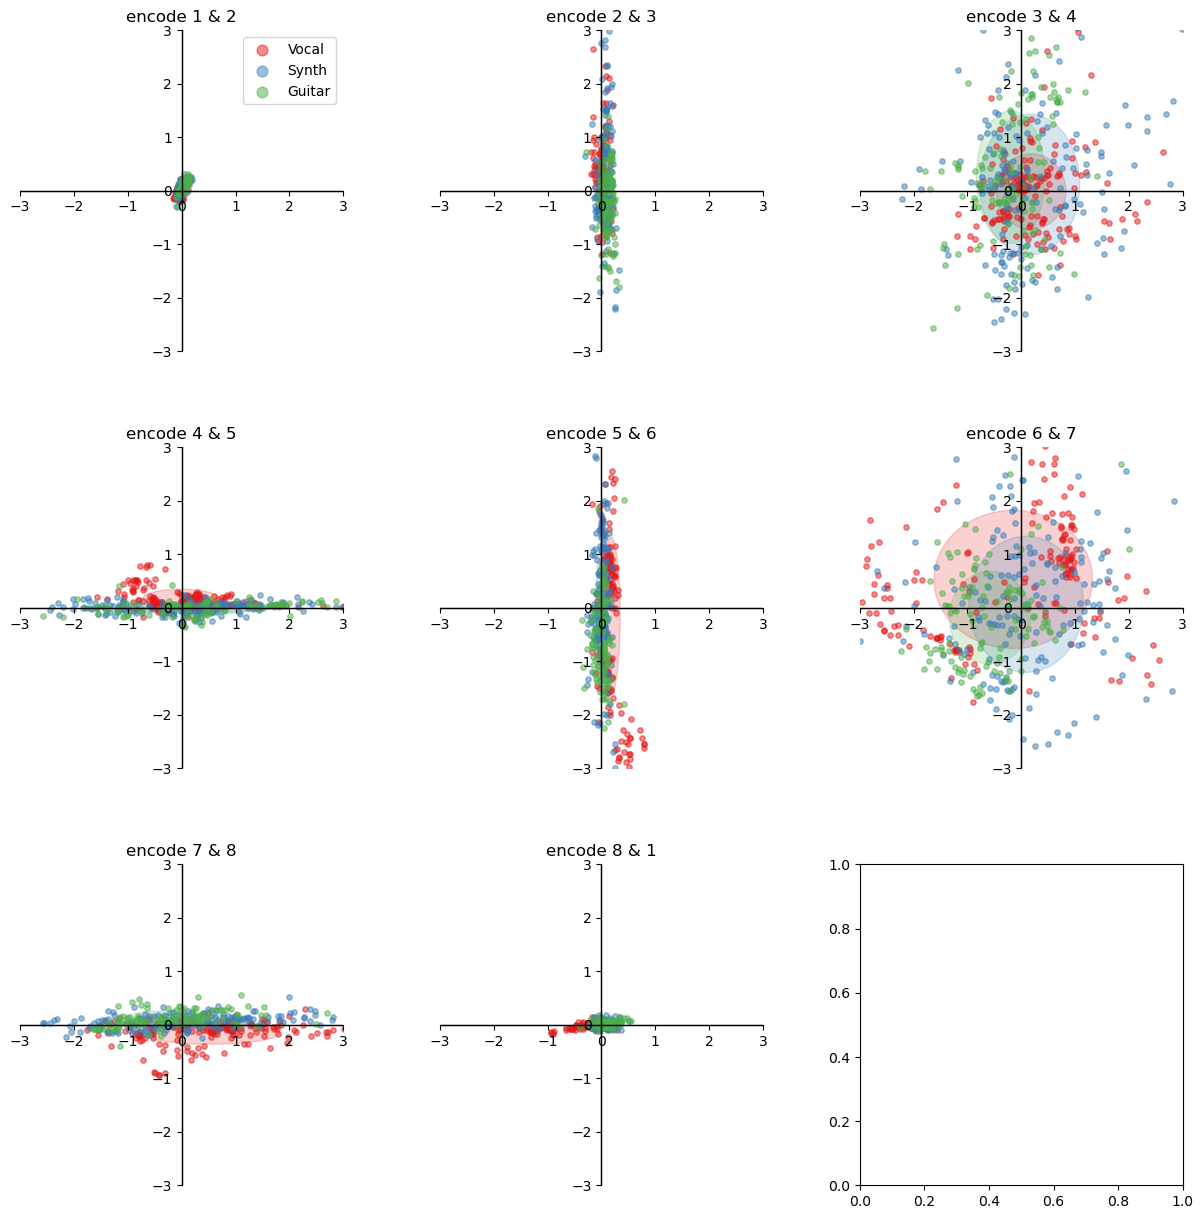

Encoded samples:
  69 x Bass
  47 x Plucked
  31 x Bell


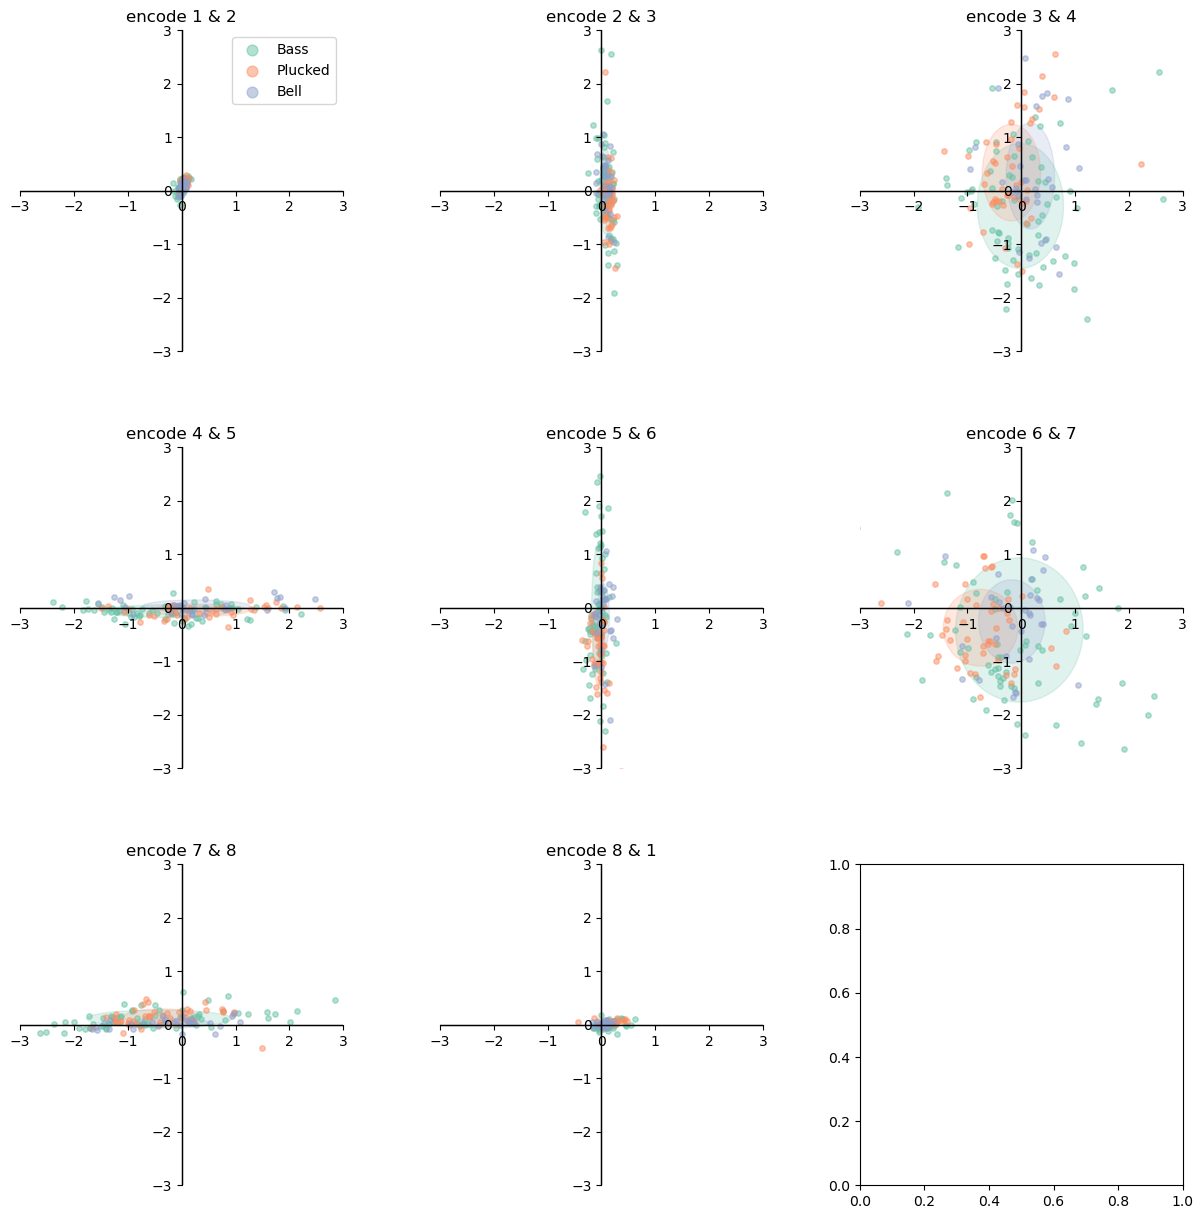

Encoded samples:
 112 x Other
  57 x Synth Makes
  22 x Piano
  31 x Bell


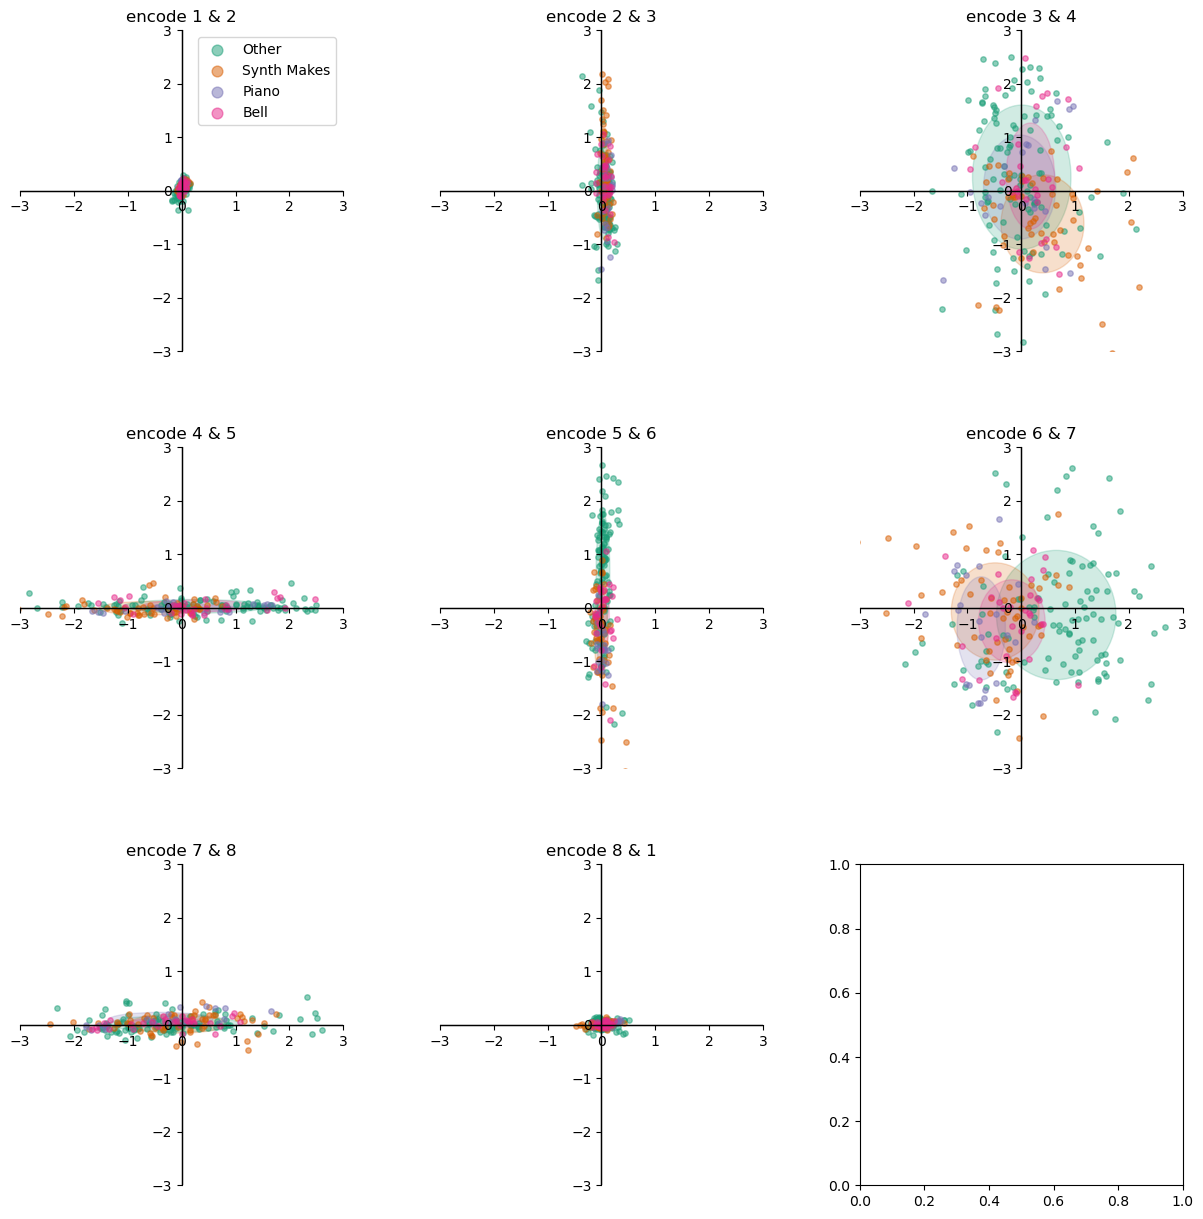

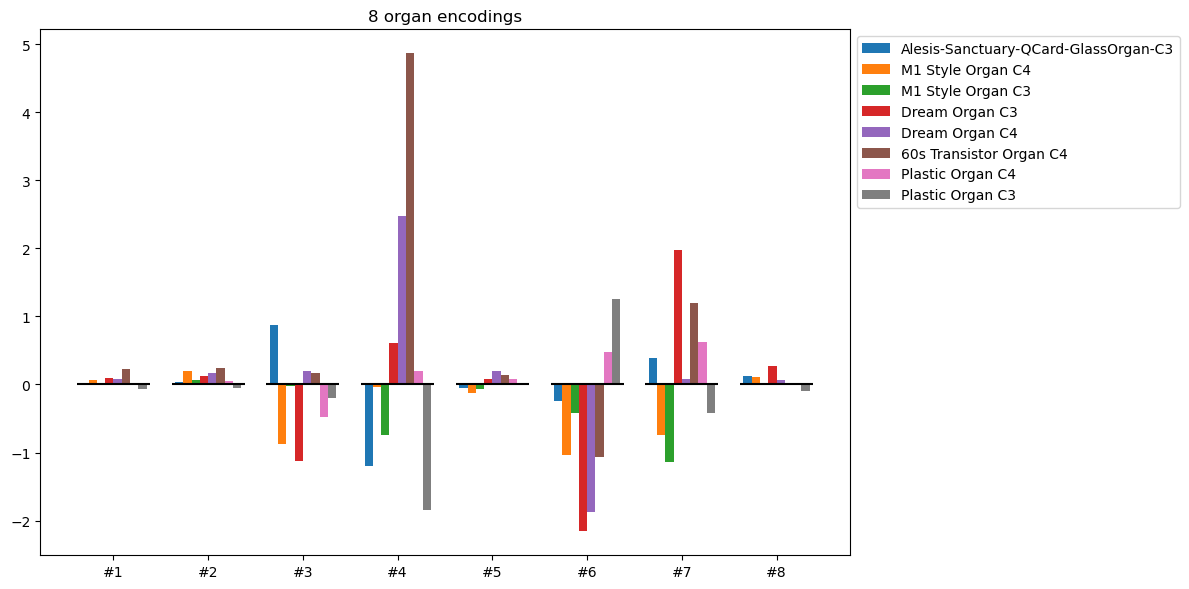

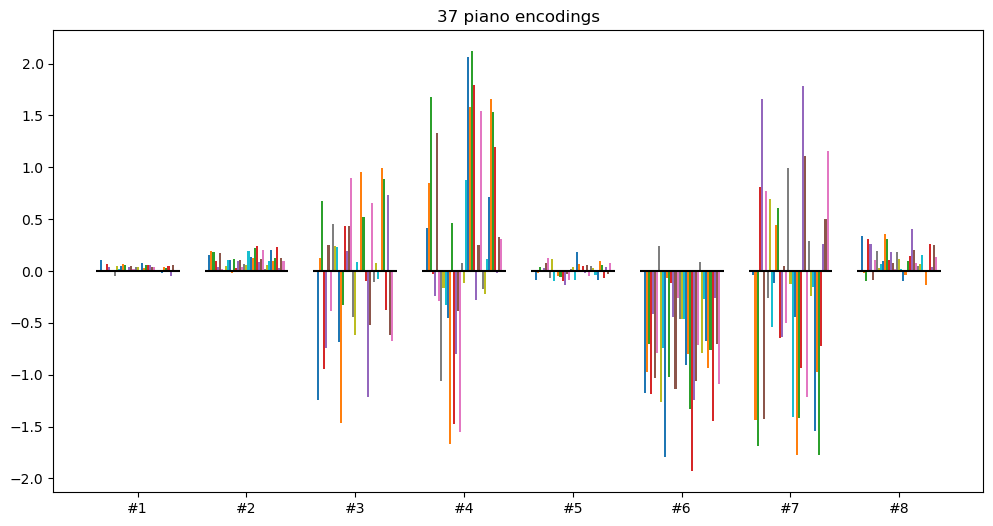

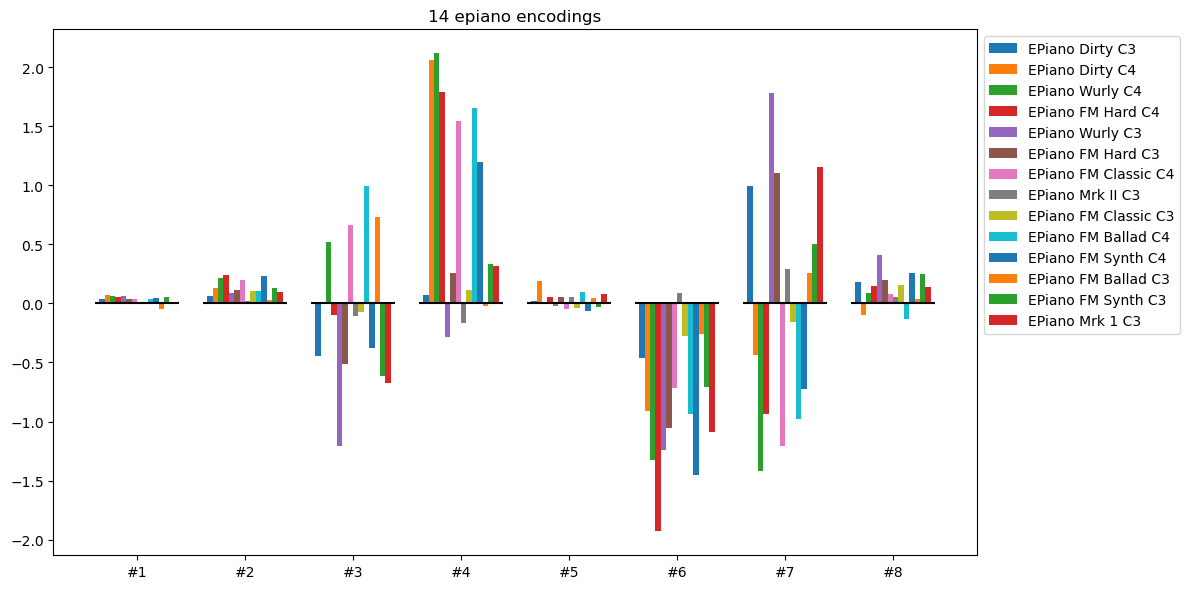

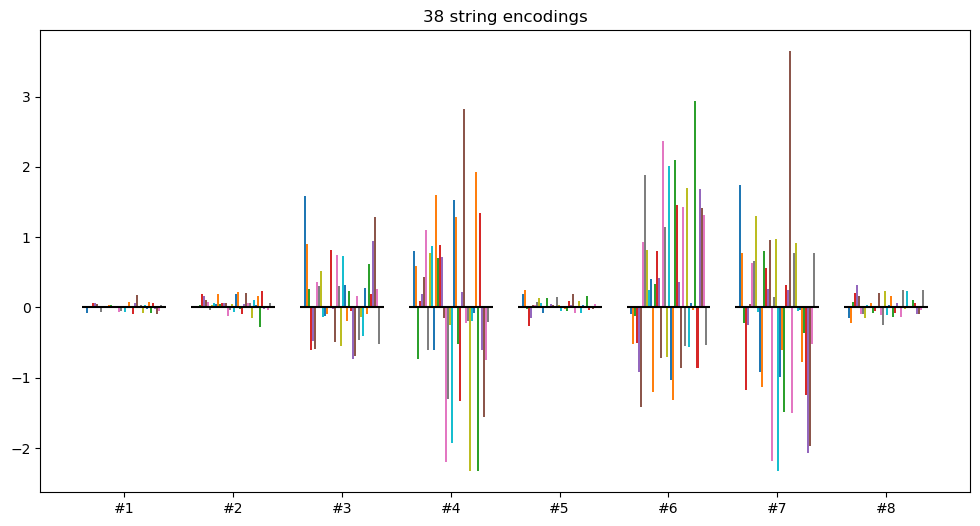

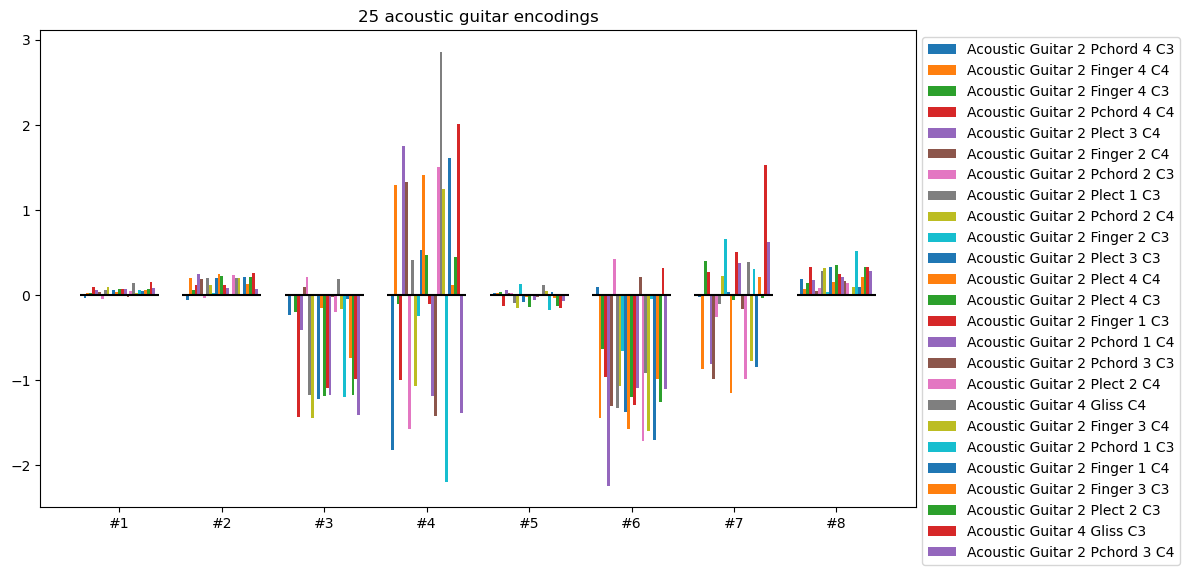

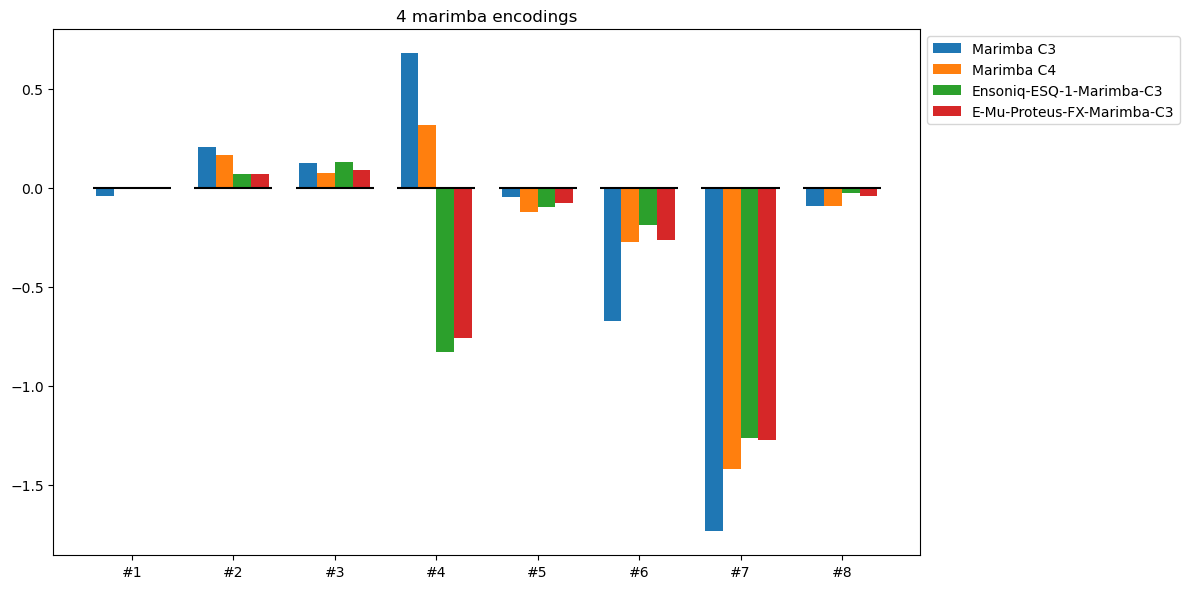

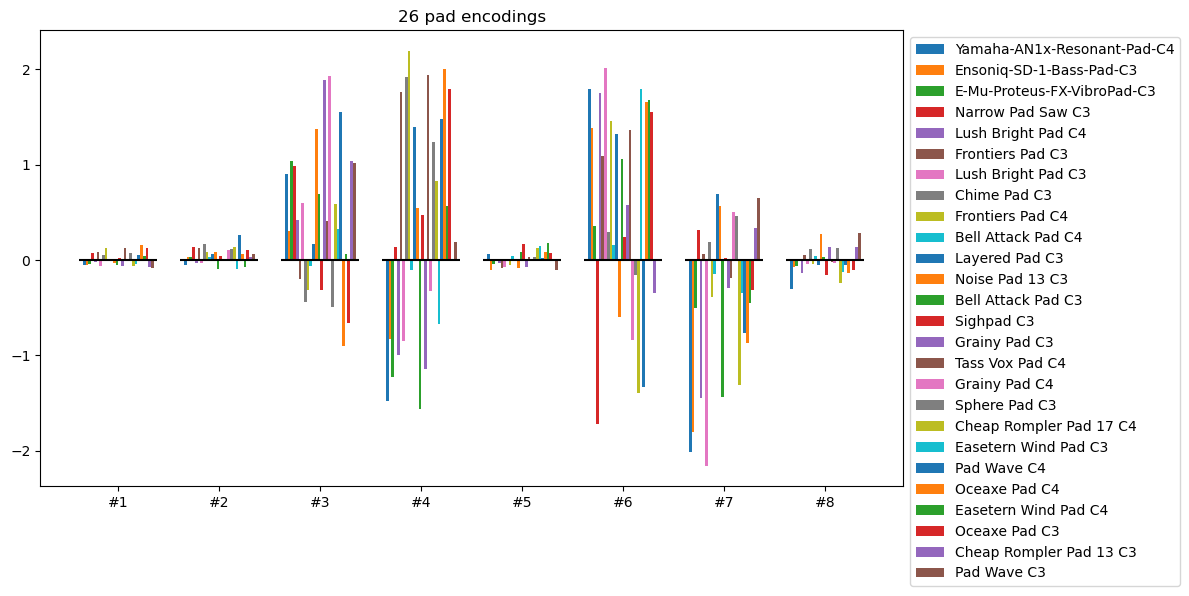

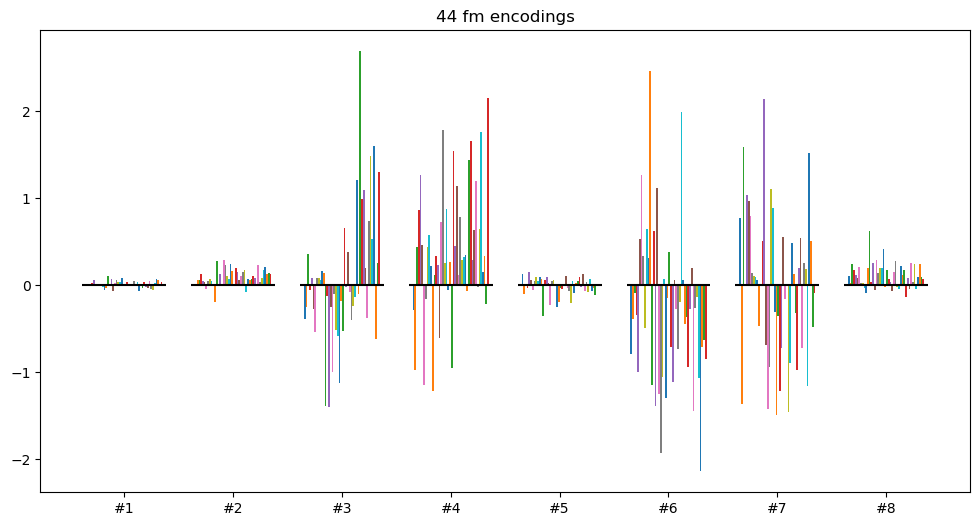

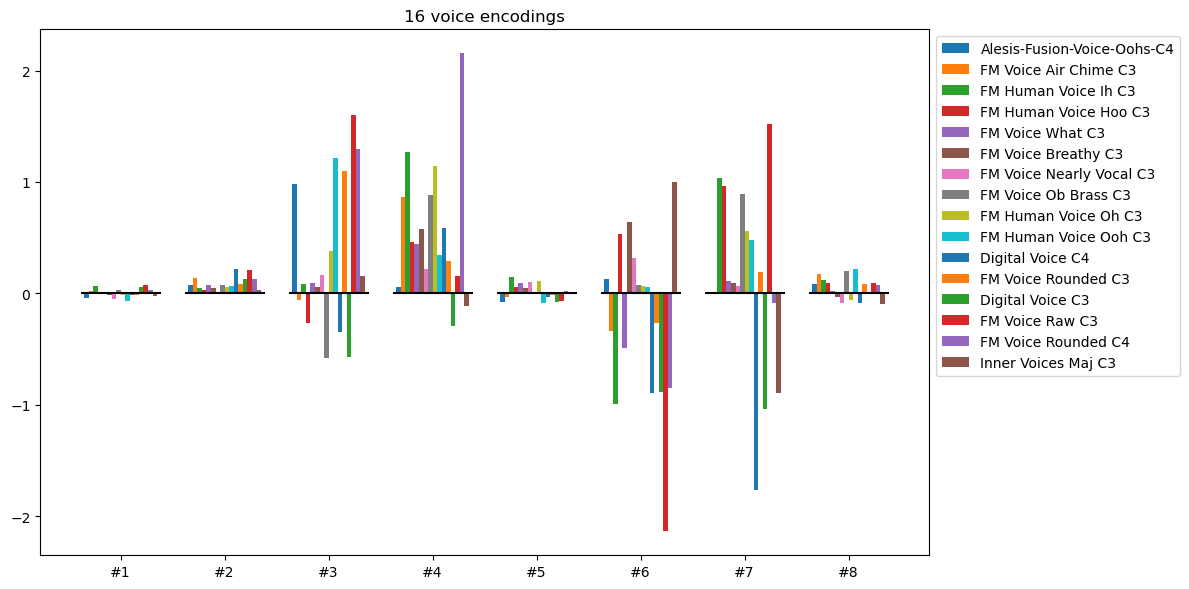

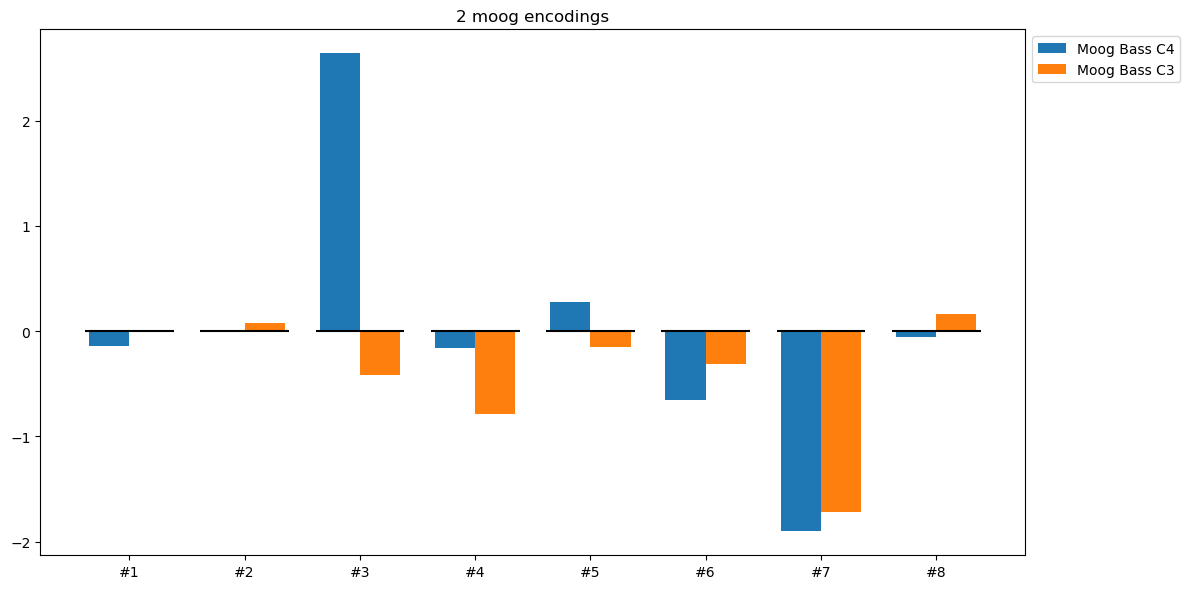

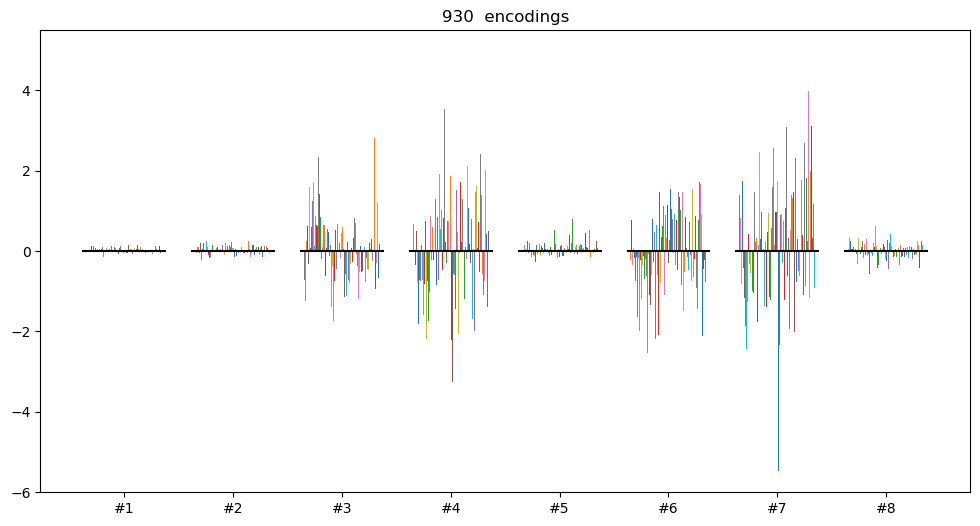

In [5]:
# Generate some new samples, either by interpolation or random perturbation
from Generate import *

# Test every sample and measure the error.
test_all()

# Create graphs of pair-wise encoding plots for a number of categories:
#plot_categories(["Vocal", "Piano", "Strings"])
plot_categories()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

#generate_morphs()

#generate_variations()

# Generate samples from each variable
#generate_main_encodings()